In [52]:
import numpy as np
import pandas as pd
from pathlib import Path

In [53]:
dft = pd.read_csv("titanic.csv", index_col = "PassengerId")
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [54]:
dft.shape

(891, 11)

In [55]:
dft.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
dft.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [58]:
#Сели в С(Embarcked) и билет (Fare) $ > 200

dft[(dft["Embarked"] == "C")&(dft["Fare"] > 200)].head(3)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [59]:
#Сортируем по убыванию платы за билет

dft[(dft["Embarked"] == "C")&(dft["Fare"] > 200)].sort_values(by = "Fare", ascending = False).head(3)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [281]:
#Создаем категории по годам пассажиров
def cat_age(age):
    if age < 35:
        return 1
    if age < 55:
        return 2
    else:
        return 3
    
cats_age = [cat_age(age) for age in dft.Age]

In [282]:
[dft.insert(loc = 5, column = "Age categ", values = cats_age[_]) for _ in cats_age]

TypeError: insert() got an unexpected keyword argument 'values'

In [283]:
dft["Age categ"] = cats_age #Добавляем категорийный столбец в Datafreym

In [285]:
dft.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age categ
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [284]:
m = dft["Sex"].value_counts()["male"]
f = dft["Sex"].value_counts()["female"]
print(f"{m} мужчин и {f} женщин")

577 мужчин и 314 женщин


In [80]:
dft["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [85]:
dft[dft.Sex == "male"]["Pclass"].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

In [86]:
dft[dft.Sex == "female"]["Pclass"].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

In [94]:
import numpy as np

In [105]:
r = round(dft["Fare"].agg([np.median, np.std]), 2)
print(f"Медиана - {r[0]}, стандартное отклонение - {r[1]}")

Медиана - 14.45, стандартное отклонение - 49.69


In [113]:
yang = round(dft[dft.Age < 30]["Survived"].mean() * 100, 1)
old = round(dft[dft.Age > 60]["Survived"].mean() * 100, 1)
print(f"{yang}% среди молодых и {old}% среди старых")

40.6% среди молодых и 22.7% среди старых


In [114]:
man = round(dft[dft.Sex == "male"]["Survived"].mean() * 100, 1)
women = round(dft[dft.Sex == "female"]["Survived"].mean() * 100, 1)
print(f"{man}% среди мужчин и {women}% среди женщин")

18.9% среди мужчин и 74.2% среди женщин


In [225]:
n = [i[(i.index(".") + 2):] for i in dft[dft["Sex"] == "male"]["Name"]]
n[0:3]

['Owen Harris', 'William Henry', 'James']

In [214]:
def prom(i):
    if i.count(" "):
        return i[:i.index(" ")]
    else:
        return i

In [226]:
n1 = [prom(i) for i in n]
n1[0:3]

['Owen', 'William', 'James']

In [227]:
n2 = [i[:i.index(" ")] if i.count(" ") else i for i in n] #Так тоже можно, без функции
n2[0:3]

['Owen', 'William', 'James']

In [219]:
n2.sort()

In [223]:
#Сначала сортируем, потом считаем каких имен больше
i_max = 0
s = 0
s1 = 0
for i in range(len(n2) - 1):
    if n2[i] == n2[i + 1]:
        s1 += 1
    else:
        if s1 > s:
            s, i_max = s1, i
        s1 = 0
print(f"Больше всех имен встречается имя {n2[i_max]} - {s} раз(а)")
       

Больше всех имен встречается имя William - 34 раз(а)


In [228]:
dft.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age categ
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [229]:
pd.crosstab(dft["Survived"], dft["Fare"])

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Survived,,,,,,,,,,,,,,,,,,,,,
0,14,1,1,1,1,1,2,2,1,1,...,1,0,0,1,1,1,1,0,2,0
1,1,0,0,0,0,0,0,0,0,0,...,2,2,3,0,0,3,1,2,2,3


In [240]:
dft.pivot_table(["Age", "Fare"], ["Survived"], aggfunc = "mean")

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


In [241]:
import matplotlib.pyplot as plt

In [245]:
import seaborn as sns
%config InlineBackend.figur_format = "retina"

<AxesSubplot:xlabel='Age', ylabel='count'>

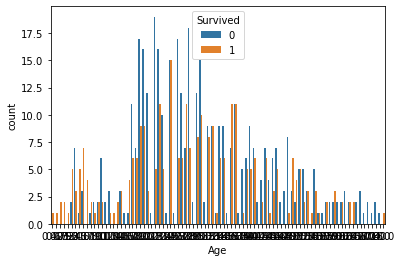

In [246]:
sns.countplot(x = "Age", hue = "Survived", data = dft)

<AxesSubplot:xlabel='Fare', ylabel='count'>

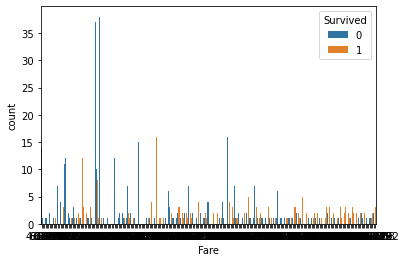

In [250]:
sns.countplot(x = "Fare", hue = "Survived", data = dft)

In [248]:
dft.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age categ
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


<AxesSubplot:xlabel='Age categ', ylabel='count'>

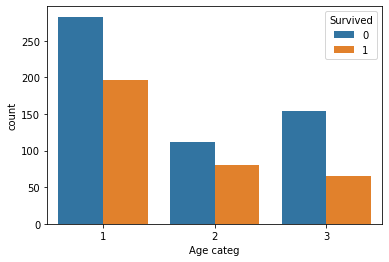

In [249]:
sns.countplot(x = "Age categ", hue = "Survived", data = dft)

<AxesSubplot:xlabel='Survived', ylabel='count'>

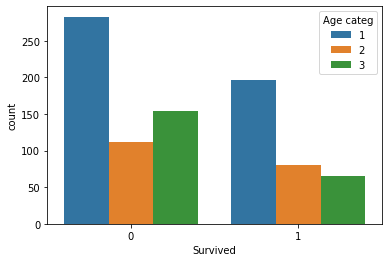

In [251]:
sns.countplot(x = "Survived", hue = "Age categ", data = dft)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

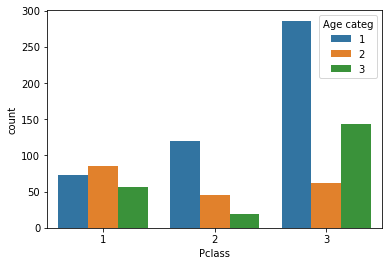

In [252]:
sns.countplot(x = "Pclass", hue = "Age categ", data = dft)

In [266]:
def change(sex):
    return 0 if sex == "female" else 1

In [269]:
change('male')

1

In [273]:
dft["Sex"].apply(change)

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int64

In [278]:
dft.pivot_table(["Age"], ["Pclass", "Sex"], aggfunc = "mean")

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [279]:
dft.pivot_table(["Age"], ["Pclass"], aggfunc = "mean")

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620
